In [1]:
import pandas as pd
import numpy as np

from tldextract import extract

In [4]:
t = pd.read_csv("aita.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
np.mean((t.selftext_wc == 1) & (t.title_wc <= 6))

0.25269758022478506

In [3]:
t.shape, t.columns

((4824787, 14),
 Index(['Unnamed: 0', 'flair', 'title', 'text', 'score', 'url', 'num_comments',
        'created_utc', 'is_self', 'num_crossposts', 'title_wc', 'selftext_wc',
        'title_cc', 'selftext_cc'],
       dtype='object'))

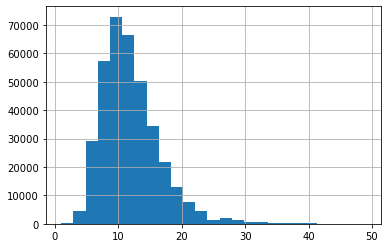

In [5]:
t.title_wc[(t.selftext_wc > 0) & (t.title_wc < 50)].hist(bins=25)

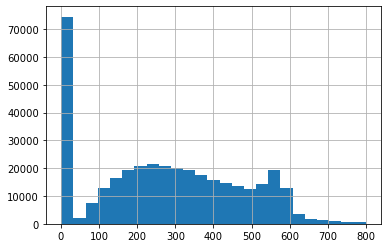

In [8]:
t.selftext_wc[(t.selftext_wc > 0) & (t.selftext_wc < 800)].hist(bins=25)

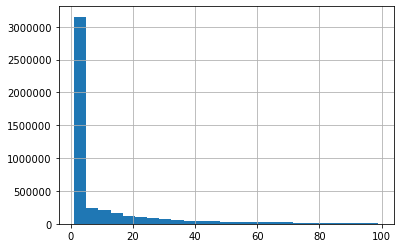

In [5]:
t.selftext_wc[(t.selftext_wc > 0) & (t.selftext_wc < 100)].hist(bins=25)

In [8]:
np.mean(t.selftext_wc == 1)

0.6182542358864754

In [10]:
np.mean(t[(t.selftext_wc == 1)].is_self)

0.578513180765988

In [25]:
t.url = t.url.apply(lambda url: extract(str(url))[1])

In [36]:
sums = t[t.is_self == False].groupby("url")["url"].count().sort_values(ascending=False)

In [43]:
(sums / t[t.is_self == False].shape[0] * 100).head(30)

url
redd             88.106852
imgur             3.481534
reddit            2.650171
youtu             1.729084
youtube           1.325284
reddituploads     0.196456
google            0.191608
soundcloud        0.169674
                  0.142415
discord           0.127474
strawpoll         0.124216
spotify           0.115474
goo               0.063816
forms             0.057856
chng              0.049829
gfycat            0.044346
imgflip           0.043313
twitter           0.042359
twitch            0.040134
change            0.037352
instagram         0.034888
tiktok            0.034173
giphy             0.031074
surveymonkey      0.030120
discordapp        0.026464
blogspot          0.022093
tumblr            0.020345
gofundme          0.015895
bandcamp          0.014623
teenkidsnews      0.013033
Name: url, dtype: float64

In [42]:
sums

url
redd                   1108645
imgur                    43808
reddit                   33347
youtu                    21757
youtube                  16676
                        ...   
kidsmovingmountains          1
kidtocode                    1
atomic-dfy                   1
kikiotolu                    1
maxgoshare                   1
Name: url, Length: 4613, dtype: int64

In [28]:
t.to_csv("teens2.csv")